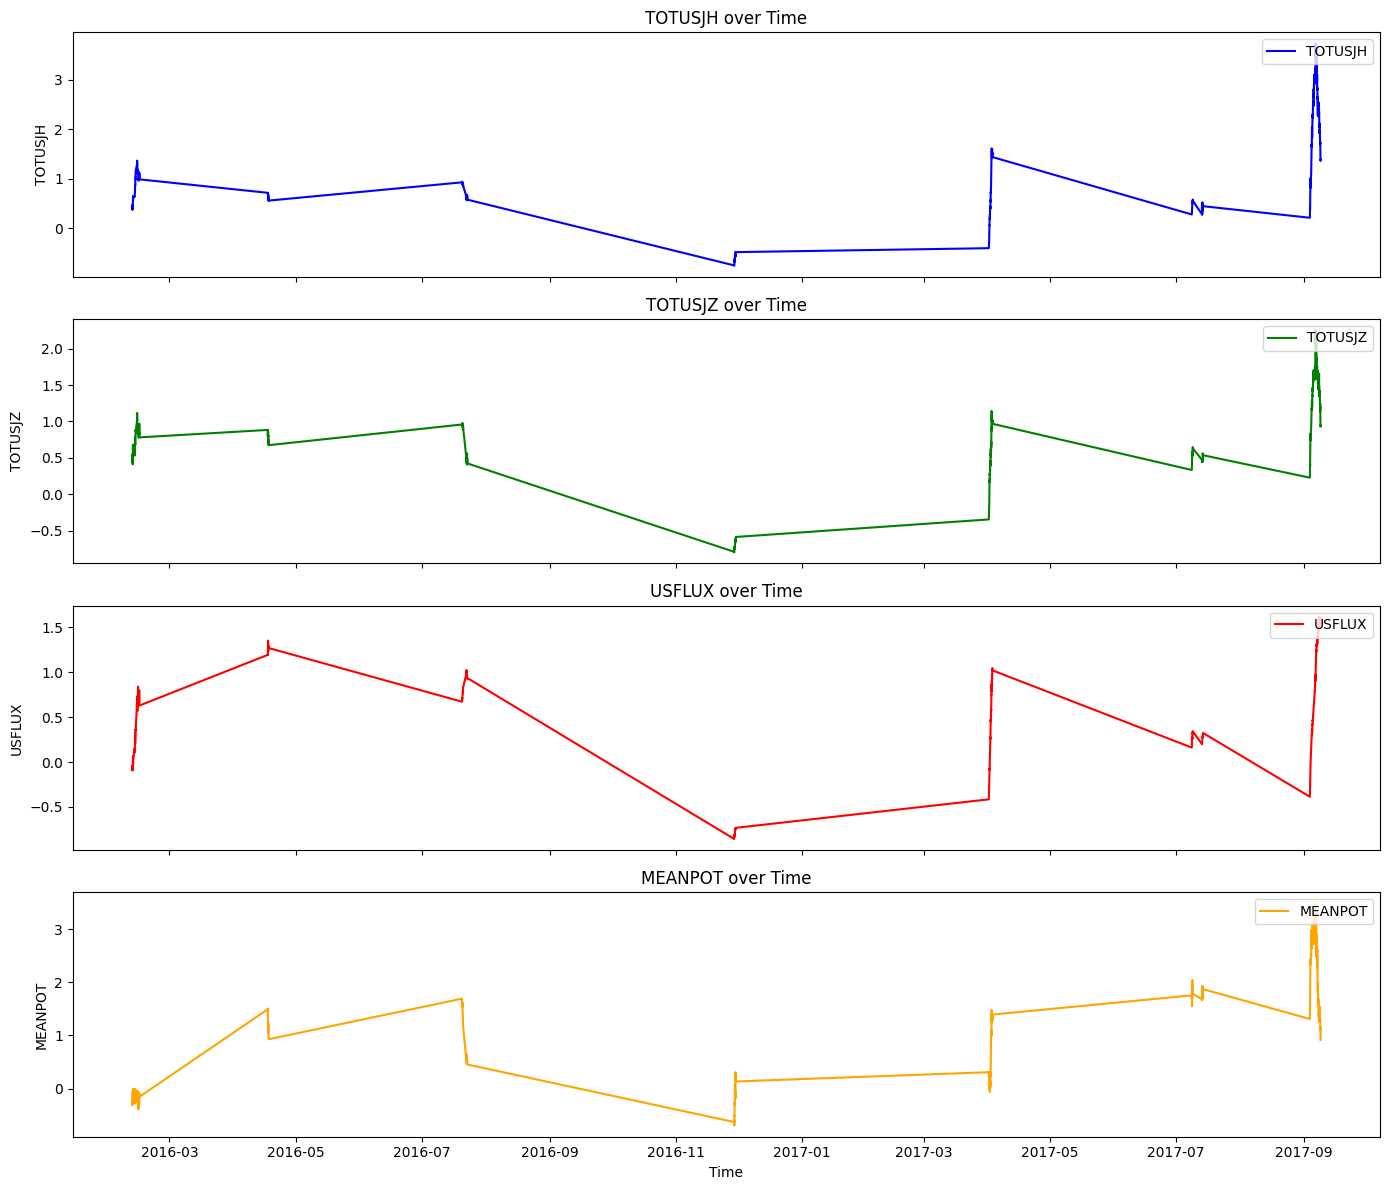

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
normalized_data = pd.read_csv(r'C:\Users\shahi\OneDrive\Desktop\Fatema_NASA\CME_data_samples\normalized_testing_12.csv')

# Convert 'Timestamp' to datetime for better plotting
normalized_data['Timestamp'] = pd.to_datetime(normalized_data['Timestamp'])

# Plotting the time series of 'TOTUSJH', 'TOTUSJZ', 'USFLUX', and 'MEANPOT'
fig, axs = plt.subplots(4, 1, figsize=(14, 12), sharex=True)

# Plot TOTUSJH
axs[0].plot(normalized_data['Timestamp'], normalized_data['TOTUSJH'], label='TOTUSJH', color='blue')
axs[0].set_ylabel('TOTUSJH')
axs[0].set_title('TOTUSJH over Time')
axs[0].legend(loc='upper right')

# Plot TOTUSJZ
axs[1].plot(normalized_data['Timestamp'], normalized_data['TOTUSJZ'], label='TOTUSJZ', color='green')
axs[1].set_ylabel('TOTUSJZ')
axs[1].set_title('TOTUSJZ over Time')
axs[1].legend(loc='upper right')

# Plot USFLUX
axs[2].plot(normalized_data['Timestamp'], normalized_data['USFLUX'], label='USFLUX', color='red')
axs[2].set_ylabel('USFLUX')
axs[2].set_title('USFLUX over Time')
axs[2].legend(loc='upper right')

# Plot MEANPOT
axs[3].plot(normalized_data['Timestamp'], normalized_data['MEANPOT'], label='MEANPOT', color='orange')
axs[3].set_ylabel('MEANPOT')
axs[3].set_xlabel('Time')
axs[3].set_title('MEANPOT over Time')
axs[3].legend(loc='upper right')

plt.tight_layout()
plt.show()


In [1]:
normalized_data[['TOTUSJH', 'TOTUSJZ', 'USFLUX', 'MEANPOT']].corr()


NameError: name 'normalized_data' is not defined

In [2]:
import pandas as pd

# Load the CSV file
normalized_data = pd.read_csv(r'C:\Users\shahi\OneDrive\Desktop\Fatema_NASA\CME_data_samples\normalized_testing_12.csv')

# Convert 'Timestamp' to datetime for better plotting and analysis
normalized_data['Timestamp'] = pd.to_datetime(normalized_data['Timestamp'])


In [3]:
print(normalized_data.columns)


Index(['Label', 'Timestamp', 'NOAA_AR_NUM', 'HARP_NUM', 'TOTUSJH', 'TOTPOT',
       'TOTUSJZ', 'ABSNJZH', 'SAVNCPP', 'USFLUX', 'AREA_ACR', 'MEANPOT',
       'R_VALUE', 'SHRGT45', 'MEANGAM', 'MEANJZH', 'MEANGBT', 'MEANGBZ',
       'MEANJZD', 'MEANGBH', 'MEANSHR', 'MEANALP'],
      dtype='object')


In [4]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Define the sequence length (e.g., 7 days)
sequence_length = 7  # Adjust based on your needs

# Select relevant columns and scale them
features = normalized_data[['TOTUSJH', 'TOTUSJZ', 'USFLUX', 'MEANPOT']]
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_features, sequence_length)


In [5]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, X.shape[2])))
model.add(Dense(4))  # Output layer: 4 features

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X, y, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Save the model
model.save('cme_lstm_model.h5')


Epoch 1/50


C:\Users\shahi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1702 - val_loss: 0.0344
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0148 - val_loss: 0.0047
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - val_loss: 0.0053
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0023 - val_loss: 0.0049
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0017 - val_loss: 0.0037
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - val_loss: 0.0026
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0010 - val_loss: 0.0032
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0015 - val_loss: 0.0026
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.7128e-04 - val_loss: 0.0017
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.4194e-04 - val_loss: 0.0020
Epoch 12/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.4212e-04 - val_

In [7]:
# Load the test data
test_data = pd.read_csv(r'C:\Users\shahi\OneDrive\Desktop\Fatema_NASA\CME_data_samples\normalized_testing_12.csv')

# Assuming the same columns as training data
test_features = test_data[['TOTUSJH', 'TOTUSJZ', 'USFLUX', 'MEANPOT']].values
test_labels = test_data['Label'].values

# Normalize the features using the same scaler used for training data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_test_features = scaler.fit_transform(test_features)


In [8]:
import numpy as np

def create_sequences(data, labels, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(labels[i + sequence_length])
    return np.array(X), np.array(y)

# Set the sequence length (same as used for training)
sequence_length = 10  # Adjust as needed

# Create sequences
X_test, y_test = create_sequences(scaled_test_features, test_labels, sequence_length)
